Codigo de googlecolab

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
import numpy as np

In [47]:
df = pd.read_csv('diabetic_data_modified.csv')
df.head()

,Unnamed: 0,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,0,0,0,0,0,0,0,No,No,NO
1,1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,0,0,0,0,0,0,2,Ch,Yes,>30
2,2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,0,0,1,0,0,0,0,No,Yes,NO
3,3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,0,0,0,0,0,0,2,Ch,Yes,NO
4,4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,0,0,1,0,0,0,1,Ch,Yes,NO


In [48]:
df = df.drop(columns=['Unnamed: 0','patient_nbr'])
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,0,0,0,0,0,0,0,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,0,0,0,0,0,0,2,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,0,0,1,0,0,0,0,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,0,0,0,0,0,0,2,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,0,0,1,0,0,0,1,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71513,Caucasian,Female,[70-80),1,1,7,9,50,2,33,...,0,0,0,2,0,0,1,Ch,Yes,>30
71514,Other,Female,[40-50),1,1,7,14,73,6,26,...,0,0,1,0,0,0,2,Ch,Yes,>30
71515,Other,Female,[60-70),1,1,7,2,46,6,17,...,0,0,0,0,0,0,1,No,Yes,>30
71516,Caucasian,Female,[80-90),1,1,7,5,76,1,22,...,0,0,0,0,0,0,2,Ch,Yes,NO


In [50]:
df.shape

(71518, 29)

In [51]:
# Definir las columnas numéricas y categóricas
numerical_cols = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses'
]
categorical_cols = [
    'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
    'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult',
    'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'diabetesMed'
]

In [53]:
# Convertir la columna 'readmitted' en binaria (NO = 0; >30 y <30 = 1)
df2 = df.copy()
df2['readmitted'] = df2['readmitted'].replace({'NO': 0, '>30': 1, '<30': 1})

# Definir las características (features) y la variable objetivo
X = df2.drop('readmitted', axis=1)  # Features
y = df2['readmitted']  # Target variable

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\Guille\AppData\Local\Temp\ipykernel_23832\625297315.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['readmitted'] = df2['readmitted'].replace({'NO': 0, '>30': 1, '<30': 1})


readmitted
0    42985
1    28533
Name: count, dtype: int64


<Axes: xlabel='readmitted', ylabel='count'>

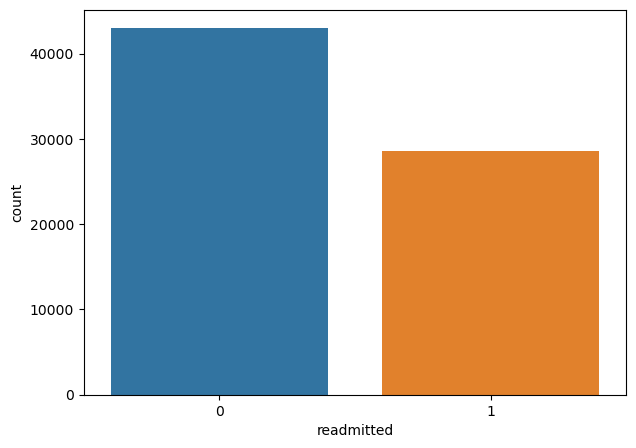

In [54]:
print(df2.readmitted.value_counts())
plt.figure(figsize=(7,5))
sns.countplot(x='readmitted', data=df2)

In [55]:
# Crear un pipeline para cada modelo
pipeline_rf = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline_xgb = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', XGBClassifier(random_state=42))
])

pipeline_lr = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

pipeline_dt = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Lista de pipelines de modelos
pipelines = [
    ('RandomForest', pipeline_rf),
    ('XGBoost', pipeline_xgb),
    ('LogisticRegression', pipeline_lr),
    ('DecisionTree', pipeline_dt)
]

# Entrenar y evaluar cada modelo en el pipeline
results = {}
for name, pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1-score': report['weighted avg']['f1-score'],
        'support': report['weighted avg']['support']
    }

# Crear DataFrame con los resultados
results_df = pd.DataFrame(results).T
results_df.index.name = 'Model'
results_df.reset_index(inplace=True)

# Mostrar la tabla comparativa
print(results_df)

                Model  precision    recall  f1-score  support
0        RandomForest   0.616925  0.634228  0.606828  14304.0
1             XGBoost   0.627435  0.642058  0.621645  14304.0
2  LogisticRegression   0.625328  0.640450  0.603574  14304.0
3        DecisionTree   0.564401  0.561102  0.562611  14304.0


***

Con balanceo de datos en el modelo

In [56]:
# Crear un pipeline para cada modelo con manejo de desbalance
pipeline_rf = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
])

pipeline_xgb = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', XGBClassifier(random_state=42, scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1])))
])

pipeline_lr = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000))
])

pipeline_dt = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])

# Lista de pipelines de modelos
pipelines = [
    ('RandomForest', pipeline_rf),
    ('XGBoost', pipeline_xgb),
    ('LogisticRegression', pipeline_lr),
    ('DecisionTree', pipeline_dt)
]

# Entrenar y evaluar cada modelo en el pipeline
results = {}
for name, pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1-score': report['weighted avg']['f1-score'],
        'support': report['weighted avg']['support']
    }

# Crear DataFrame con los resultados
results_df = pd.DataFrame(results).T
results_df.index.name = 'Model'
results_df.reset_index(inplace=True)

# Mostrar la tabla comparativa
print(results_df)

                Model  precision    recall  f1-score  support
0        RandomForest   0.615146  0.632830  0.605214  14304.0
1             XGBoost   0.632543  0.617240  0.621509  14304.0
2  LogisticRegression   0.624879  0.608641  0.613099  14304.0
3        DecisionTree   0.569496  0.565157  0.567078  14304.0


***

Submuestreo (Undersampling)

Balanceo por submuestreo

In [57]:
# Separa las clases
clase_mayoritaria = df2[df2['readmitted'] == 0]
clase_minoritaria = df2[df2['readmitted'] == 1]

In [58]:
# Submuestreo de la clase mayoritaria
clase_mayoritaria_muestra_reducida = resample(clase_mayoritaria, 
                                              replace=False,    # Muestras sin reemplazo
                                              n_samples=len(clase_minoritaria),    # Igualar número de muestras
                                              random_state=42)  # Reproducibilidad

# Concatenar las clases submuestreadas
df_submuestreo = pd.concat([clase_mayoritaria_muestra_reducida, clase_minoritaria])

# df_balanceado ahora contiene clases balanceadas
df_submuestreo

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
22684,Caucasian,Female,[70-80),1,6,7,2,49,1,15,...,0,0,1,0,0,1,1,Ch,Yes,0
22734,AfricanAmerican,Female,[70-80),3,1,1,4,38,1,18,...,0,0,0,0,0,0,0,No,No,0
1977,Caucasian,Female,[60-70),2,1,4,2,31,2,21,...,0,1,0,0,0,0,1,Ch,Yes,0
35224,Caucasian,Male,[40-50),1,1,7,2,56,0,2,...,0,0,0,0,0,0,0,No,No,0
48169,Caucasian,Female,[70-80),2,1,1,4,71,2,13,...,0,0,0,0,0,0,1,Ch,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71503,NaN,Female,[70-80),2,1,1,4,41,0,13,...,0,0,0,0,0,0,1,Ch,Yes,1
71508,Caucasian,Female,[40-50),1,4,7,14,69,0,16,...,2,0,0,1,0,0,3,Ch,Yes,1
71513,Caucasian,Female,[70-80),1,1,7,9,50,2,33,...,0,0,0,2,0,0,1,Ch,Yes,1
71514,Other,Female,[40-50),1,1,7,14,73,6,26,...,0,0,1,0,0,0,2,Ch,Yes,1


readmitted
0    28533
1    28533
Name: count, dtype: int64


<Axes: xlabel='readmitted', ylabel='count'>

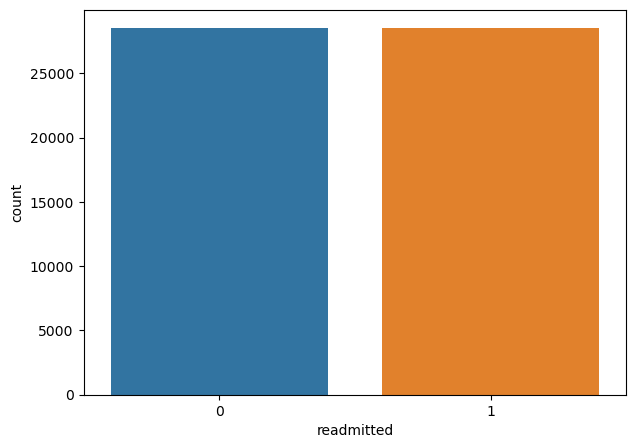

In [59]:
print(df_submuestreo.readmitted.value_counts())
plt.figure(figsize=(7,5))
sns.countplot(x='readmitted', data=df_submuestreo)

In [60]:
# Definir las características (features) y la variable objetivo
X = df_submuestreo.drop('readmitted', axis=1)  # Features
y = df_submuestreo['readmitted']  # Target variable

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Crear un pipeline para cada modelo
pipeline_rf = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline_xgb = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', XGBClassifier(random_state=42))
])

pipeline_lr = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

pipeline_dt = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Lista de pipelines de modelos
pipelines = [
    ('RandomForest', pipeline_rf),
    ('XGBoost', pipeline_xgb),
    ('LogisticRegression', pipeline_lr),
    ('DecisionTree', pipeline_dt)
]

# Entrenar y evaluar cada modelo en el pipeline
results = {}
for name, pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1-score': report['weighted avg']['f1-score'],
        'support': report['weighted avg']['support']
    }

# Crear DataFrame con los resultados
results_df = pd.DataFrame(results).T
results_df.index.name = 'Model'
results_df.reset_index(inplace=True)

# Mostrar la tabla comparativa
print(results_df)

                Model  precision    recall  f1-score  support
0        RandomForest   0.605580  0.605572  0.605561  11414.0
1             XGBoost   0.610393  0.610391  0.610390  11414.0
2  LogisticRegression   0.607607  0.607587  0.607563  11414.0
3        DecisionTree   0.545315  0.545295  0.545221  11414.0


***

Sobremuestreo (Oversampling)

In [62]:
# Ejemplo: Sobremuestreo de la clase minoritaria
clase_minoritaria_sobremuestreada = resample(clase_minoritaria, 
                                             replace=True,     # Muestras con reemplazo
                                             n_samples=len(clase_mayoritaria),    # Igualar número de muestras
                                             random_state=42)  # Reproducibilidad

# Concatenar las clases sobremuestreadas
df_sobremuestreo = pd.concat([clase_mayoritaria, clase_minoritaria_sobremuestreada])

# df_balanceado ahora contiene clases balanceadas
df_sobremuestreo

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,0,0,0,0,0,0,0,No,No,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,0,0,1,0,0,0,0,No,Yes,0
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,0,0,0,0,0,0,2,Ch,Yes,0
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,0,0,1,0,0,0,1,Ch,Yes,0
6,Caucasian,Male,[60-70),3,1,2,4,70,1,21,...,1,1,0,0,0,0,1,Ch,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,Hispanic,Female,[70-80),6,1,17,2,60,2,14,...,1,0,0,0,1,0,0,Ch,Yes,1
11507,Caucasian,Male,[40-50),2,18,1,11,48,3,17,...,0,0,0,0,0,0,2,Ch,Yes,1
29359,Caucasian,Male,[50-60),2,3,1,7,1,2,21,...,1,1,1,0,0,0,2,Ch,Yes,1
9561,AfricanAmerican,Female,[70-80),1,18,3,2,28,0,5,...,0,0,0,0,0,0,0,No,No,1


readmitted
0    42985
1    42985
Name: count, dtype: int64


<Axes: xlabel='readmitted', ylabel='count'>

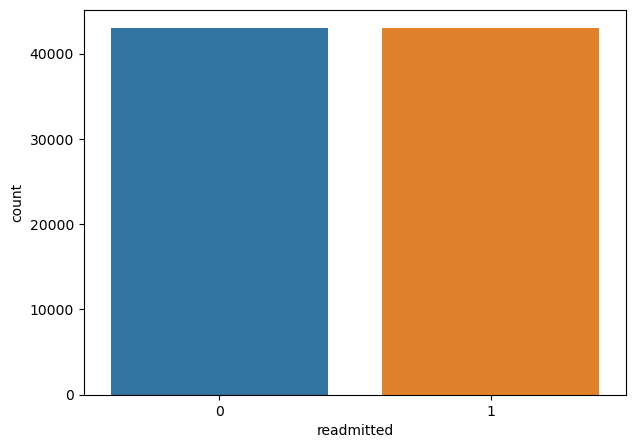

In [63]:
print(df_sobremuestreo.readmitted.value_counts())
plt.figure(figsize=(7,5))
sns.countplot(x='readmitted', data=df_sobremuestreo)

In [64]:
# Definir las características (features) y la variable objetivo
X = df_sobremuestreo.drop('readmitted', axis=1)  # Features
y = df_sobremuestreo['readmitted']  # Target variable

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Crear un pipeline para cada modelo
pipeline_rf = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline_xgb = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', XGBClassifier(random_state=42))
])

pipeline_lr = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

pipeline_dt = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Lista de pipelines de modelos
pipelines = [
    ('RandomForest', pipeline_rf),
    ('XGBoost', pipeline_xgb),
    ('LogisticRegression', pipeline_lr),
    ('DecisionTree', pipeline_dt)
]

# Entrenar y evaluar cada modelo en el pipeline
results = {}
for name, pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1-score': report['weighted avg']['f1-score'],
        'support': report['weighted avg']['support']
    }

# Crear DataFrame con los resultados
results_df = pd.DataFrame(results).T
results_df.index.name = 'Model'
results_df.reset_index(inplace=True)

# Mostrar la tabla comparativa
print(results_df)

ValueError: Found unknown categories [20] in column 4 during transform

In [83]:
X_test['discharge_disposition_id'].unique()

array([ 1,  6,  2,  3, 22, 18, 28, 25, 11,  4,  5,  7,  8, 13, 23, 14, 15,
       17, 24,  9, 10, 19, 20], dtype=int64)

In [84]:
X_train['discharge_disposition_id'].unique()


array([ 1, 22,  6,  3, 18,  7, 11, 28,  5,  4,  2, 23, 25, 13, 14, 17,  8,
       27, 24, 15, 10, 12, 16, 19,  9], dtype=int64)